In [1]:
# Imports Packages and Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

scaler = MinMaxScaler()
auto_df = pd.read_csv("automobile.txt", delimiter=",")

In [2]:
# Data columns
print(auto_df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [3]:
# Cleaning data

# - Count of missing data across all columns (which in this case was represented by a "?")
# - value count for all columns to identify any issues with values
# - drop symboling column
# - loop run to make sure all string information is lower-case (see code below)
# - Checked dtype for each column is correct

for column in auto_df:
    if auto_df[column].dtypes == "object":
        auto_df[column] = auto_df[column].str.lower()

In [4]:
# The "symboling" column isn't of much use, so I will drop it from the Dataset

auto_df.drop(columns=["symboling"], inplace=True)

In [5]:
# I also replace all hyphens in column names with underscores, as hyphens interupt the parsing
# of python code in Jupyter

for title in auto_df.columns.to_list():
    new_title = title.replace("-","_")
    auto_df.rename(columns={title : new_title}, inplace=True)

In [6]:
# Checking dtype for all columns
print(auto_df.dtypes)

normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object


In [7]:
# Check all unique values in dataframe:
for column in auto_df:
    print(auto_df[column].value_counts(dropna=False))

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized_losses, dtype: int64
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Na

In [8]:
# Missing Data

# Missing data in this dataframe seems to be marked by a "?", the below code counts the number in
# each column
print("Total Number of Records: " + str(auto_df.make.count()))

print("Missing Values:\n")
for column in auto_df:
    if auto_df[column].dtype == "object":
        print(str(column) + " " + str(auto_df[column].str.count("\?").sum()))


Total Number of Records: 205
Missing Values:

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


In [9]:
# "normalized-losses" has a large number of missing data, for that reason I will drop that column

auto_df.drop(columns=["normalized_losses"], inplace=True)

In [10]:
# For the other missing values, I will check if any patterns in the data may allow me to fill in the
# missing data. For those values that I cannot do this for, I will drop them from the set:

print(auto_df[auto_df["bore"] == "?"].iloc[:,[0,4,16,17]])


     make body_style bore stroke
55  mazda  hatchback    ?      ?
56  mazda  hatchback    ?      ?
57  mazda  hatchback    ?      ?
58  mazda  hatchback    ?      ?


In [11]:
# We can see that the missing "bore" and "stroke" values apply to the same vehicles at indexes 55-58. Since we have a reasonable
# number of vehicles of that "make" other than the ones missing values, I will remove these records.

auto_df.drop([55, 56, 57, 58], inplace=True)

In [12]:
# Check missing values for horsepower:
print(auto_df[auto_df["horsepower"] == "?"].iloc[:,[0,19,20]])

        make horsepower peak_rpm
130  renault          ?        ?
131  renault          ?        ?


In [13]:
# As we can see, the same issue exists where these cars both have two missing values: horsepower and peak_rpm.
# Annoyingly they are the only two "renault" makes in the dataset, however the data fields missing 
# are reasonably important, so again I will drop them from the dataset.

auto_df.drop([130,131], inplace=True)

In [14]:
# Check missing prices:

print(auto_df[auto_df["price"] == "?"].iloc[:,[0,23]])

        make price
9       audi     ?
44     isuzu     ?
45     isuzu     ?
129  porsche     ?


In [15]:
# As price is a very important field, I will also drop the above examples from the dataset:

auto_df.drop([9,44,45,129], inplace=True)

In [16]:
# Number of doors check:
print(auto_df[auto_df["num_of_doors"] == "?"].iloc[:,[0,3,4]])

     make num_of_doors body_style
27  dodge            ?      sedan
63  mazda            ?      sedan


In [17]:
# As this is discrete data, I will attempt to extrapolate the values from the dataset. As they are both "sedan"
# in body_style, I will use the most common "num_of_doors" for that type to fill in the data:

print(auto_df[auto_df["body_style"] == "sedan"].num_of_doors.value_counts())

four    78
two     14
?        2
Name: num_of_doors, dtype: int64


In [18]:
# As the majority of sedans have four doors, I will assign this value to the missing data. As this is the
# last remaining missing data, I will apply the new value to all remaining "?" values:

auto_df = auto_df.replace(["?"], "four")


In [19]:
# As can now be seen, all instances of "?" marking missing values are gone.
print("Missing Values:\n")
for column in auto_df:
    if auto_df[column].dtype == "object":
        print(str(column) + " " + str(auto_df[column].str.count("\?").sum()))

Missing Values:

make 0
fuel_type 0
aspiration 0
num_of_doors 0
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 0
stroke 0
horsepower 0
peak_rpm 0
price 0


In [20]:
# A number of numerical columns are classed as "object" rather than "float64". The following
# code corrects that:

numerics = ["bore","stroke","horsepower","peak_rpm", "price"]

for column in numerics:
    auto_df[column] = pd.to_numeric(auto_df[column])

Text(0.5, 1.0, 'Fig.1 Count by Make')

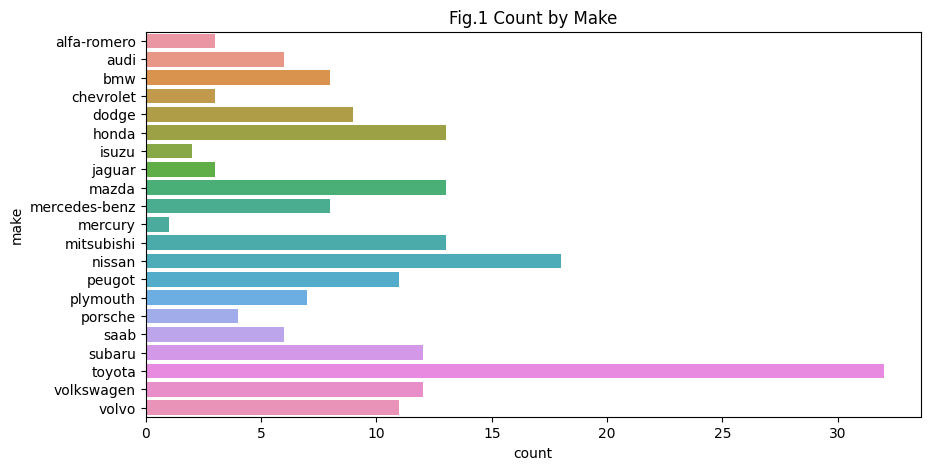

In [21]:
# Visualisations

# Visualisations based on "make"

plt.figure(figsize=[10,5])
sns.countplot(data=auto_df, y="make")
plt.title("Fig.1 Count by Make")

Text(0.5, 1.0, 'Fig.2 Make vs. Price')

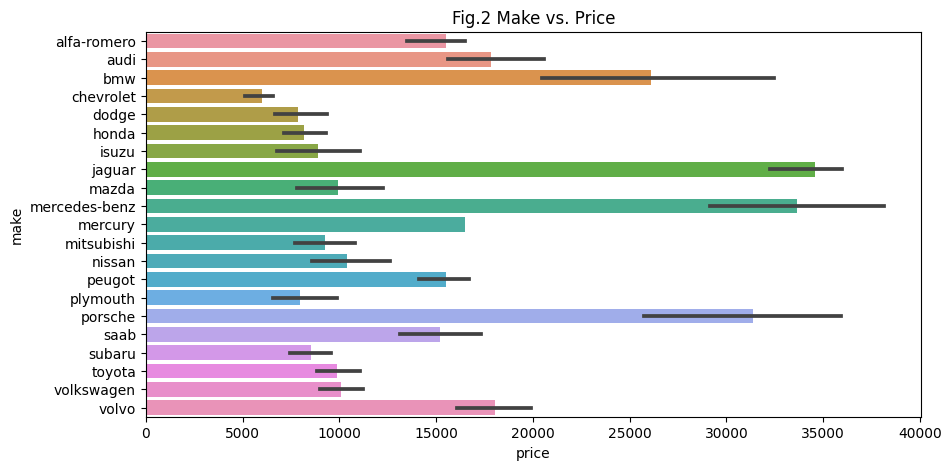

In [22]:
plt.figure(figsize=[10,5])
sns.barplot(data=auto_df, y="make", x="price")
plt.title("Fig.2 Make vs. Price")

Text(0.5, 1.0, 'Fig.2a Body Style vs. Price')

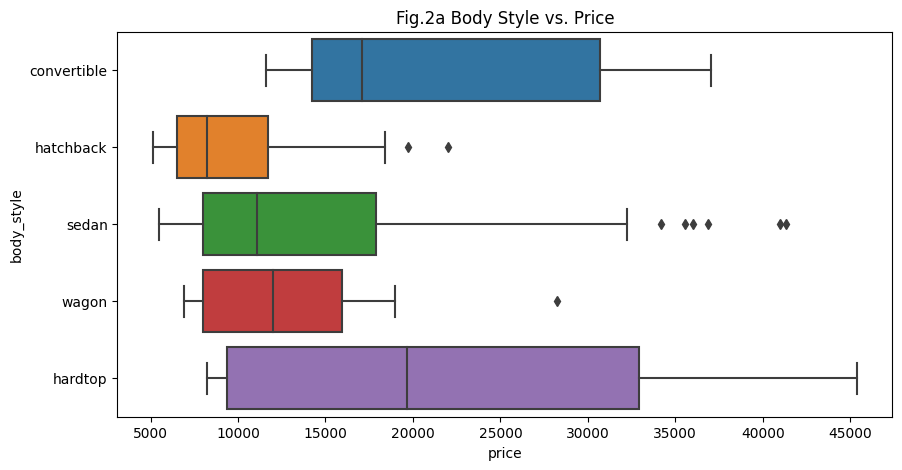

In [23]:
plt.figure(figsize=[10,5])
sns.boxplot(data=auto_df, y="body_style", x="price")
plt.title("Fig.2a Body Style vs. Price")

Text(0.5, 1.0, 'Fig.2b Body Style Count by High Price Make')

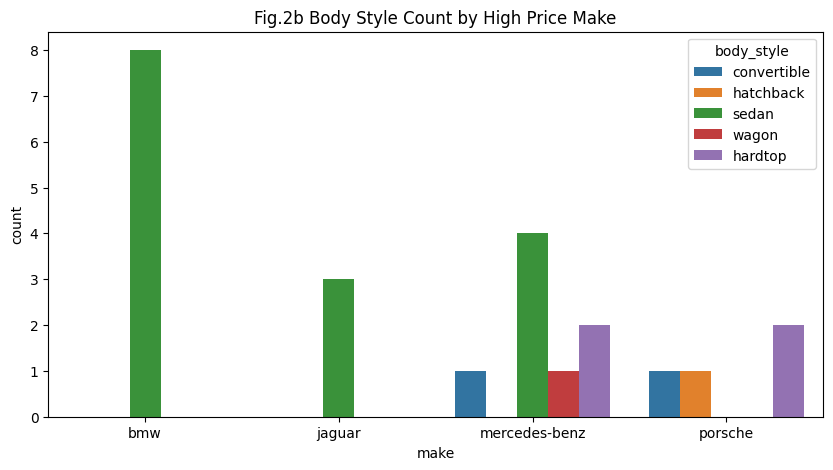

In [24]:
brands = ["bmw", "jaguar", "mercedes-benz", "porsche"]
expensive_makes = auto_df[auto_df["make"].isin(brands)]

plt.figure(figsize=[10,5])
sns.countplot(data=expensive_makes, x="make", hue="body_style",
              hue_order=["convertible", "hatchback", "sedan", "wagon", "hardtop"])
plt.title("Fig.2b Body Style Count by High Price Make")

Text(0.5, 1.0, 'Fig.2c Body Style Count')

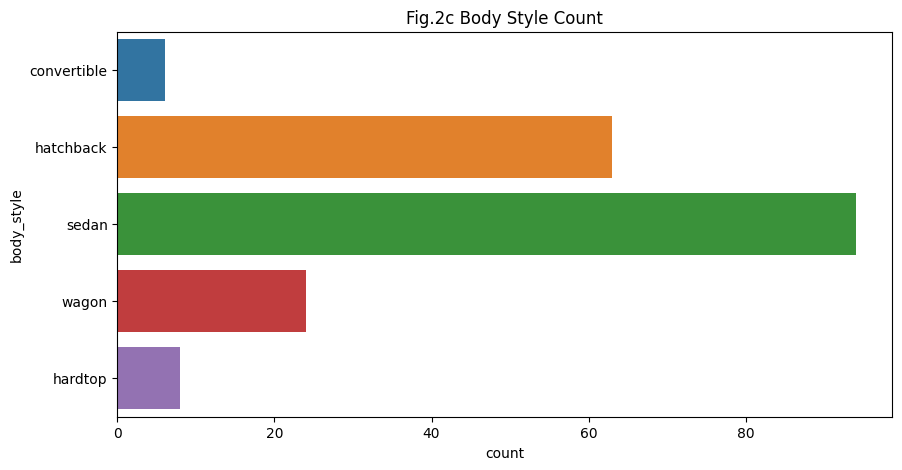

In [25]:
plt.figure(figsize=[10,5])
sns.countplot(data=auto_df, y="body_style")
plt.title("Fig.2c Body Style Count")

Text(0.5, 1.0, 'Fig.3 Horsepower vs. Make')

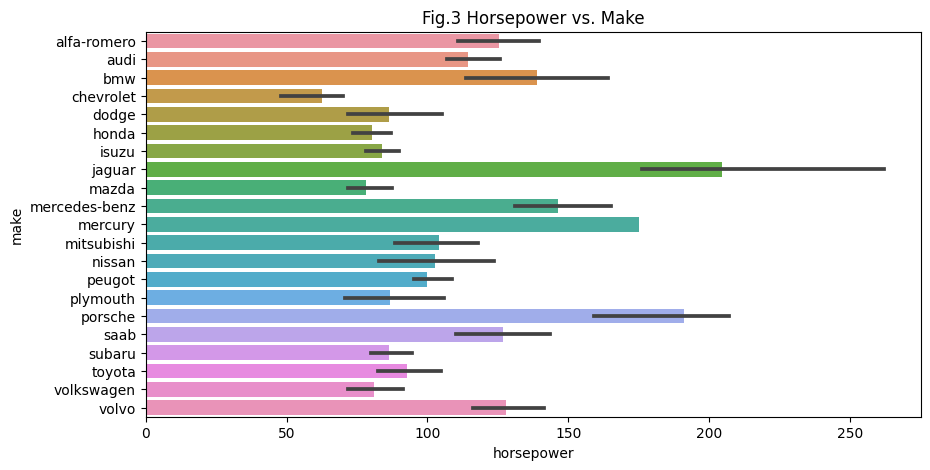

In [26]:
plt.figure(figsize=[10,5])
sns.barplot(data=auto_df, y="make", x="horsepower")
plt.title("Fig.3 Horsepower vs. Make")

Text(0.5, 1.0, 'Fig.4 Horsepower vs. Price by Body Style')

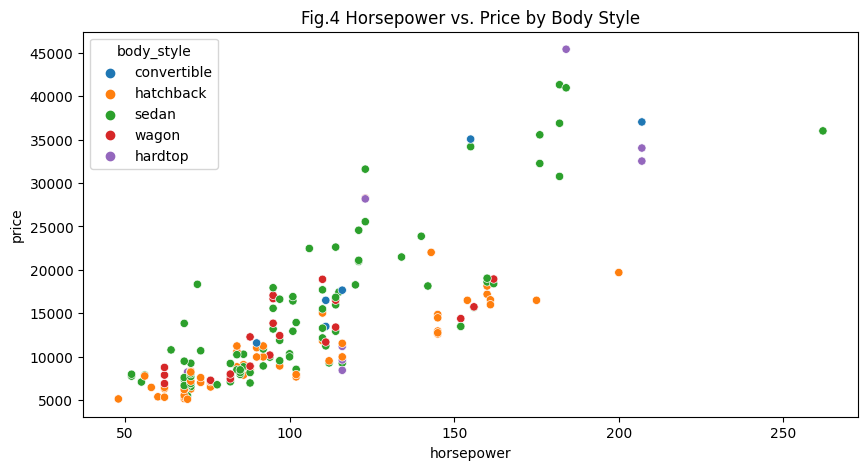

In [27]:
# Visualisations by Price

plt.figure(figsize=[10,5])
sns.scatterplot(data=auto_df, x="horsepower", y="price", hue="body_style")
plt.title("Fig.4 Horsepower vs. Price by Body Style")

Text(0.5, 1.0, 'Fig.5 Fuel Type vs. Price')

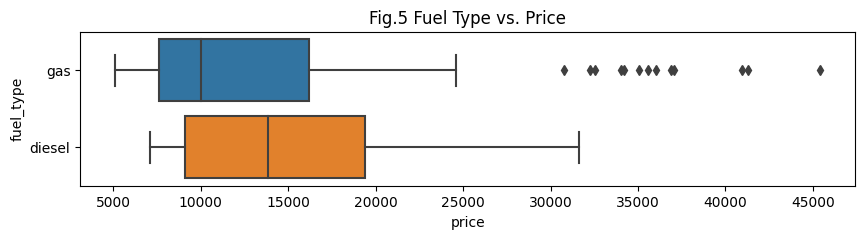

In [28]:
plt.figure(figsize=[10,2])
sns.boxplot(data=auto_df, y="fuel_type", x="price")
plt.title("Fig.5 Fuel Type vs. Price")

Text(0.5, 1.0, 'Fig.5a Count by Fuel Type')

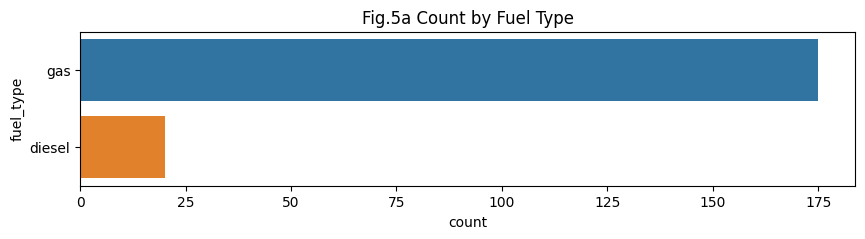

In [29]:
plt.figure(figsize=[10,2])
sns.countplot(data=auto_df, y="fuel_type")
plt.title("Fig.5a Count by Fuel Type")

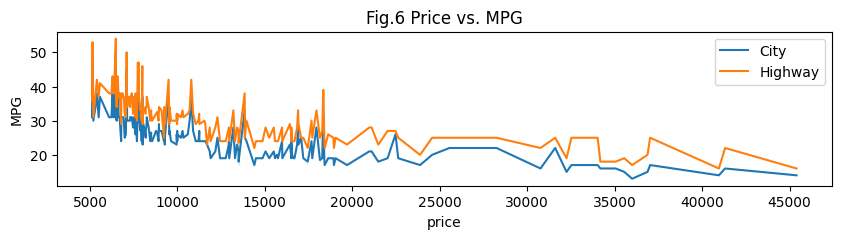

In [30]:
plt.figure(figsize=[10,2])
ax = sns.lineplot(data=auto_df, y="city_mpg", x="price", label="City")
ax1 = sns.lineplot(data=auto_df, y="highway_mpg", x="price", label="Highway")
plt.title("Fig.6 Price vs. MPG")
plt.ylabel("MPG")
plt.legend()

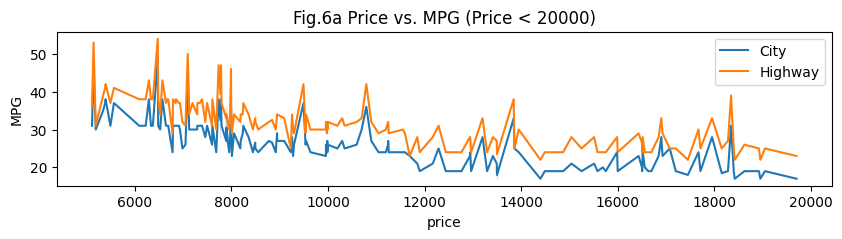

In [31]:
below_20000 = auto_df[auto_df["price"] <= 20000]

plt.figure(figsize=[10,2])
ax = sns.lineplot(data=below_20000, y="city_mpg", x="price", label="City")
ax1 = sns.lineplot(data=below_20000, y="highway_mpg", x="price", label="Highway")
plt.title("Fig.6a Price vs. MPG (Price < 20000)")
plt.ylabel("MPG")
plt.legend()

Text(0.5, 1.0, 'Fig.7 Volume vs. Price')

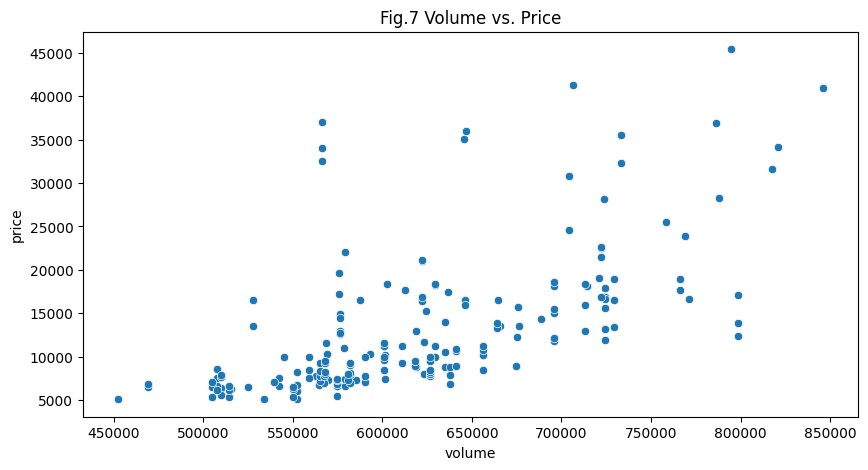

In [32]:
plt.figure(figsize=[10,5])
auto_df["volume"] = auto_df["height"] * auto_df["width"] * auto_df["length"]
sns.scatterplot(data=auto_df, x="volume", y="price")
plt.title("Fig.7 Volume vs. Price")

Text(0.5, 1.0, 'Fig.8 Drive Wheels vs. Horsepower')

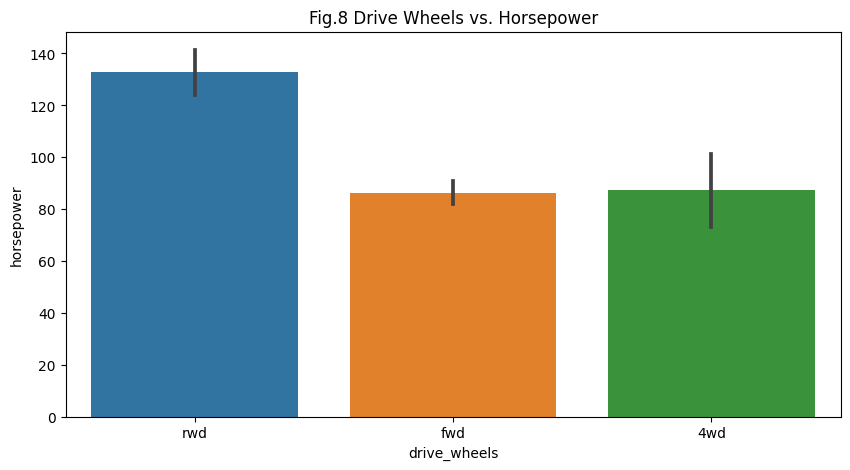

In [33]:
# Visualisations by Horsepower
plt.figure(figsize=[10,5])
sns.barplot(data=auto_df, x="drive_wheels", y="horsepower")
plt.title("Fig.8 Drive Wheels vs. Horsepower")

Text(0.5, 1.0, 'Fig.8a Drive Wheels vs. Price')

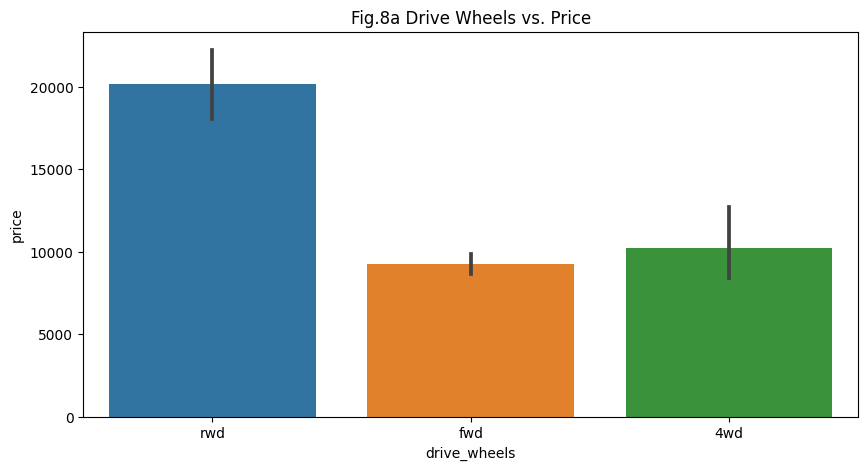

In [34]:
plt.figure(figsize=[10,5])
sns.barplot(data=auto_df, x="drive_wheels", y="price")
plt.title("Fig.8a Drive Wheels vs. Price")

Text(0.5, 1.0, 'Fig.9 City MPG by Fuel type')

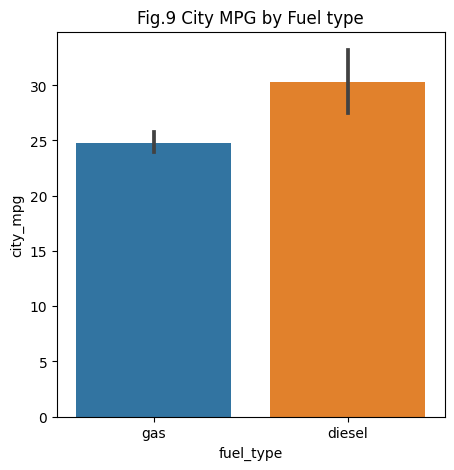

In [35]:
plt.figure(figsize=[5,5])
sns.barplot(data=auto_df, x="fuel_type", y="city_mpg")
plt.title("Fig.9 City MPG by Fuel type")

Text(0.5, 1.0, 'Fig.9a Highway MPG by Fuel type')

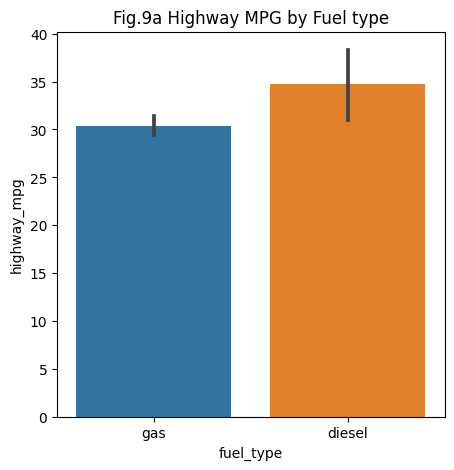

In [36]:
plt.figure(figsize=[5,5])
sns.barplot(data=auto_df, x="fuel_type", y="highway_mpg")
plt.title("Fig.9a Highway MPG by Fuel type")

Text(0.5, 1.0, 'Fig.10 Horsepower by Fuel type')

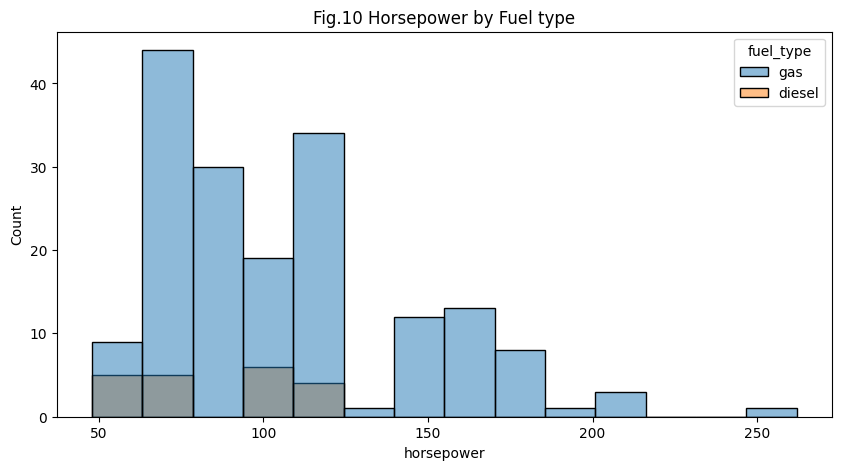

In [37]:
plt.figure(figsize=[10,5])
sns.histplot(data=auto_df, x="horsepower", hue="fuel_type")
plt.title("Fig.10 Horsepower by Fuel type")

Text(0.5, 1.0, 'Fig.11 Peak RPM by Fuel type')

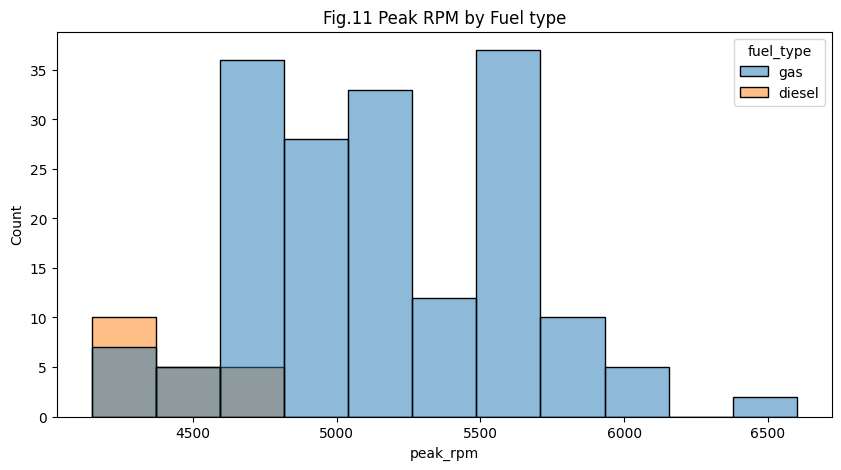

In [38]:
plt.figure(figsize=[10,5])
sns.histplot(data=auto_df, x="peak_rpm", hue="fuel_type")
plt.title("Fig.11 Peak RPM by Fuel type")

Text(0.5, 1.0, 'Fig.12 City MPG by Make')

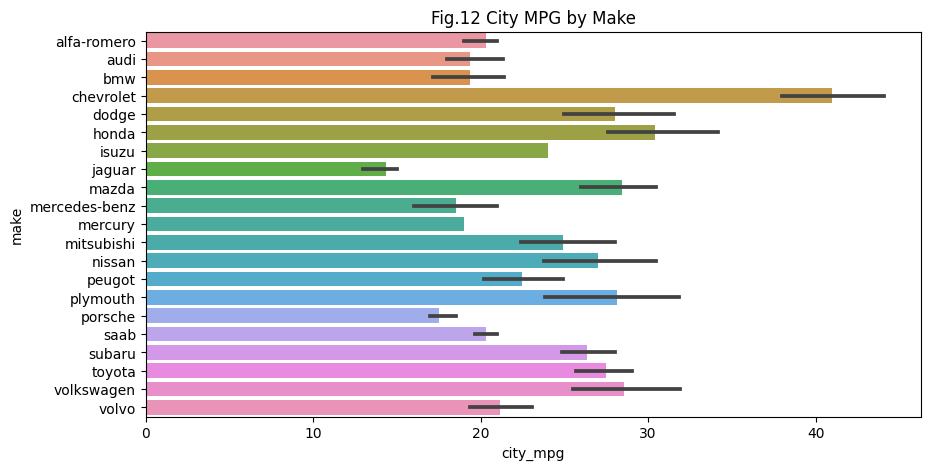

In [39]:
# Visualtisations by MPG
plt.figure(figsize=[10,5])
sns.barplot(data=auto_df, y="make", x="city_mpg")
plt.title("Fig.12 City MPG by Make")


Text(0.5, 0, 'bore/stroke')

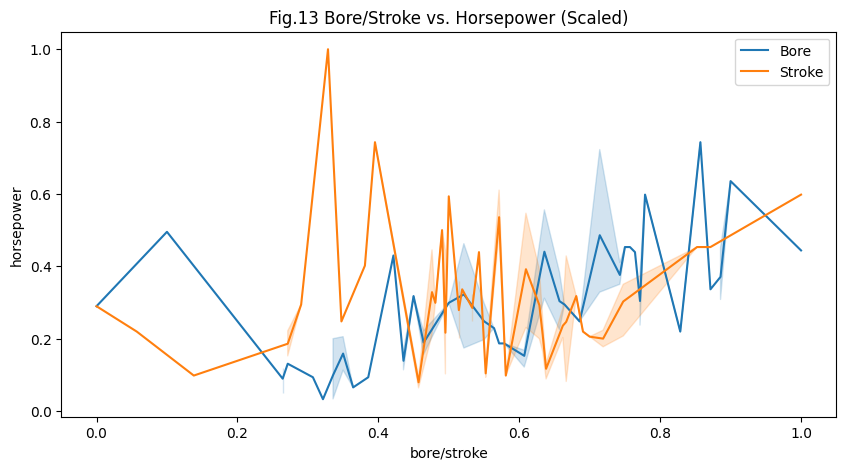

In [40]:
auto_numericals = auto_df.iloc[:,[7,8,9,10,11,16,17,19,20,21,22,23]]
temp_columns = auto_numericals.columns.to_list()

numericals_scaled = scaler.fit_transform(auto_numericals.to_numpy())
numericals_scaled = pd.DataFrame(numericals_scaled, columns=temp_columns)

plt.figure(figsize=[10,5])
sns.lineplot(numericals_scaled, x="bore", y="horsepower", label="Bore")
sns.lineplot(numericals_scaled, x="stroke", y="horsepower", label="Stroke")
plt.title("Fig.13 Bore/Stroke vs. Horsepower (Scaled)")
plt.xlabel("bore/stroke")

Text(0.5, 0, 'bore/stroke')

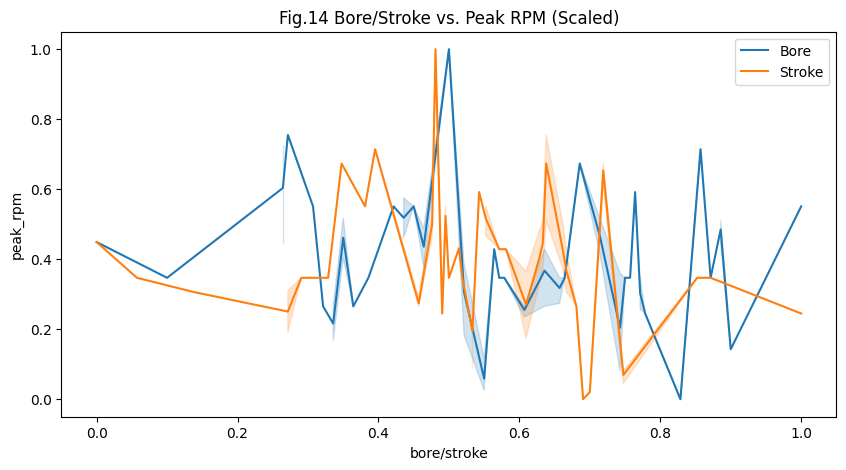

In [41]:
plt.figure(figsize=[10,5])
sns.lineplot(numericals_scaled, x="bore", y="peak_rpm", label="Bore")
sns.lineplot(numericals_scaled, x="stroke", y="peak_rpm", label="Stroke")
plt.title("Fig.14 Bore/Stroke vs. Peak RPM (Scaled)")
plt.xlabel("bore/stroke")

Text(0.5, 0, 'bore/stroke')

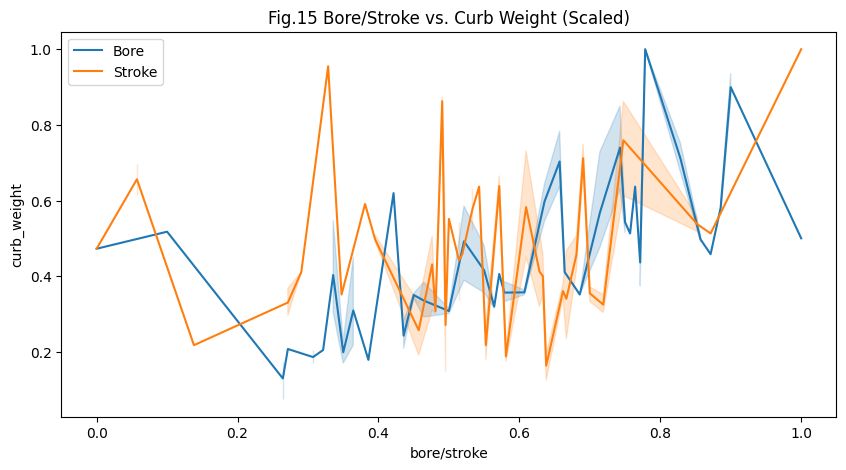

In [42]:
plt.figure(figsize=[10,5])
sns.lineplot(numericals_scaled, x="bore", y="curb_weight", label="Bore")
sns.lineplot(numericals_scaled, x="stroke", y="curb_weight", label="Stroke")
plt.title("Fig.15 Bore/Stroke vs. Curb Weight (Scaled)")
plt.xlabel("bore/stroke")

In [43]:
plt.figure(figsize=[10,5])
sns.barplot(data=sorted_by_cylinders, x="num_of_cylinders", y="horsepower",
           order = ["three","four","five","six","eight","twelve"])
plt.title("Fig.16 Number of Cylinders vs. Horsepower")

NameError: name 'sorted_by_cylinders' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=[10,5])
sns.barplot(data=sorted_by_cylinders, x="num_of_cylinders", y="peak_rpm",
           order = ["three","four","five","six","eight","twelve"])
plt.title("Fig.17 Number of Cylinders vs. Peak RPM")

In [ ]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=auto_df, x="horsepower", y="compression_ratio")
plt.title("Fig.18 Compression Ratio vs. Horsepower")

In [ ]:
sns.barplot(data=auto_df, x="fuel_type", y="compression_ratio")
plt.title("Fig.18a Compression Ratio by Fuel Type")

In [ ]:
compression_capped = auto_df[auto_df["fuel_type"] == "gas"]
plt.figure(figsize=[10,5])
sns.scatterplot(data=compression_capped, x="horsepower", y="compression_ratio")
plt.title("Fig.19 Compression Ratio vs. Horsepower for Gas Cars")

In [ ]:
print(auto_df.columns)

In [ ]:
plt.figure(figsize=[10,5])
sns.barplot(data=auto_df, x="num_of_cylinders", y="compression_ratio", hue="fuel_type",
           order = ["three","four","five","six","eight","twelve"])
plt.title("Fig.20 Compression Ratio by Number of Cylinders")